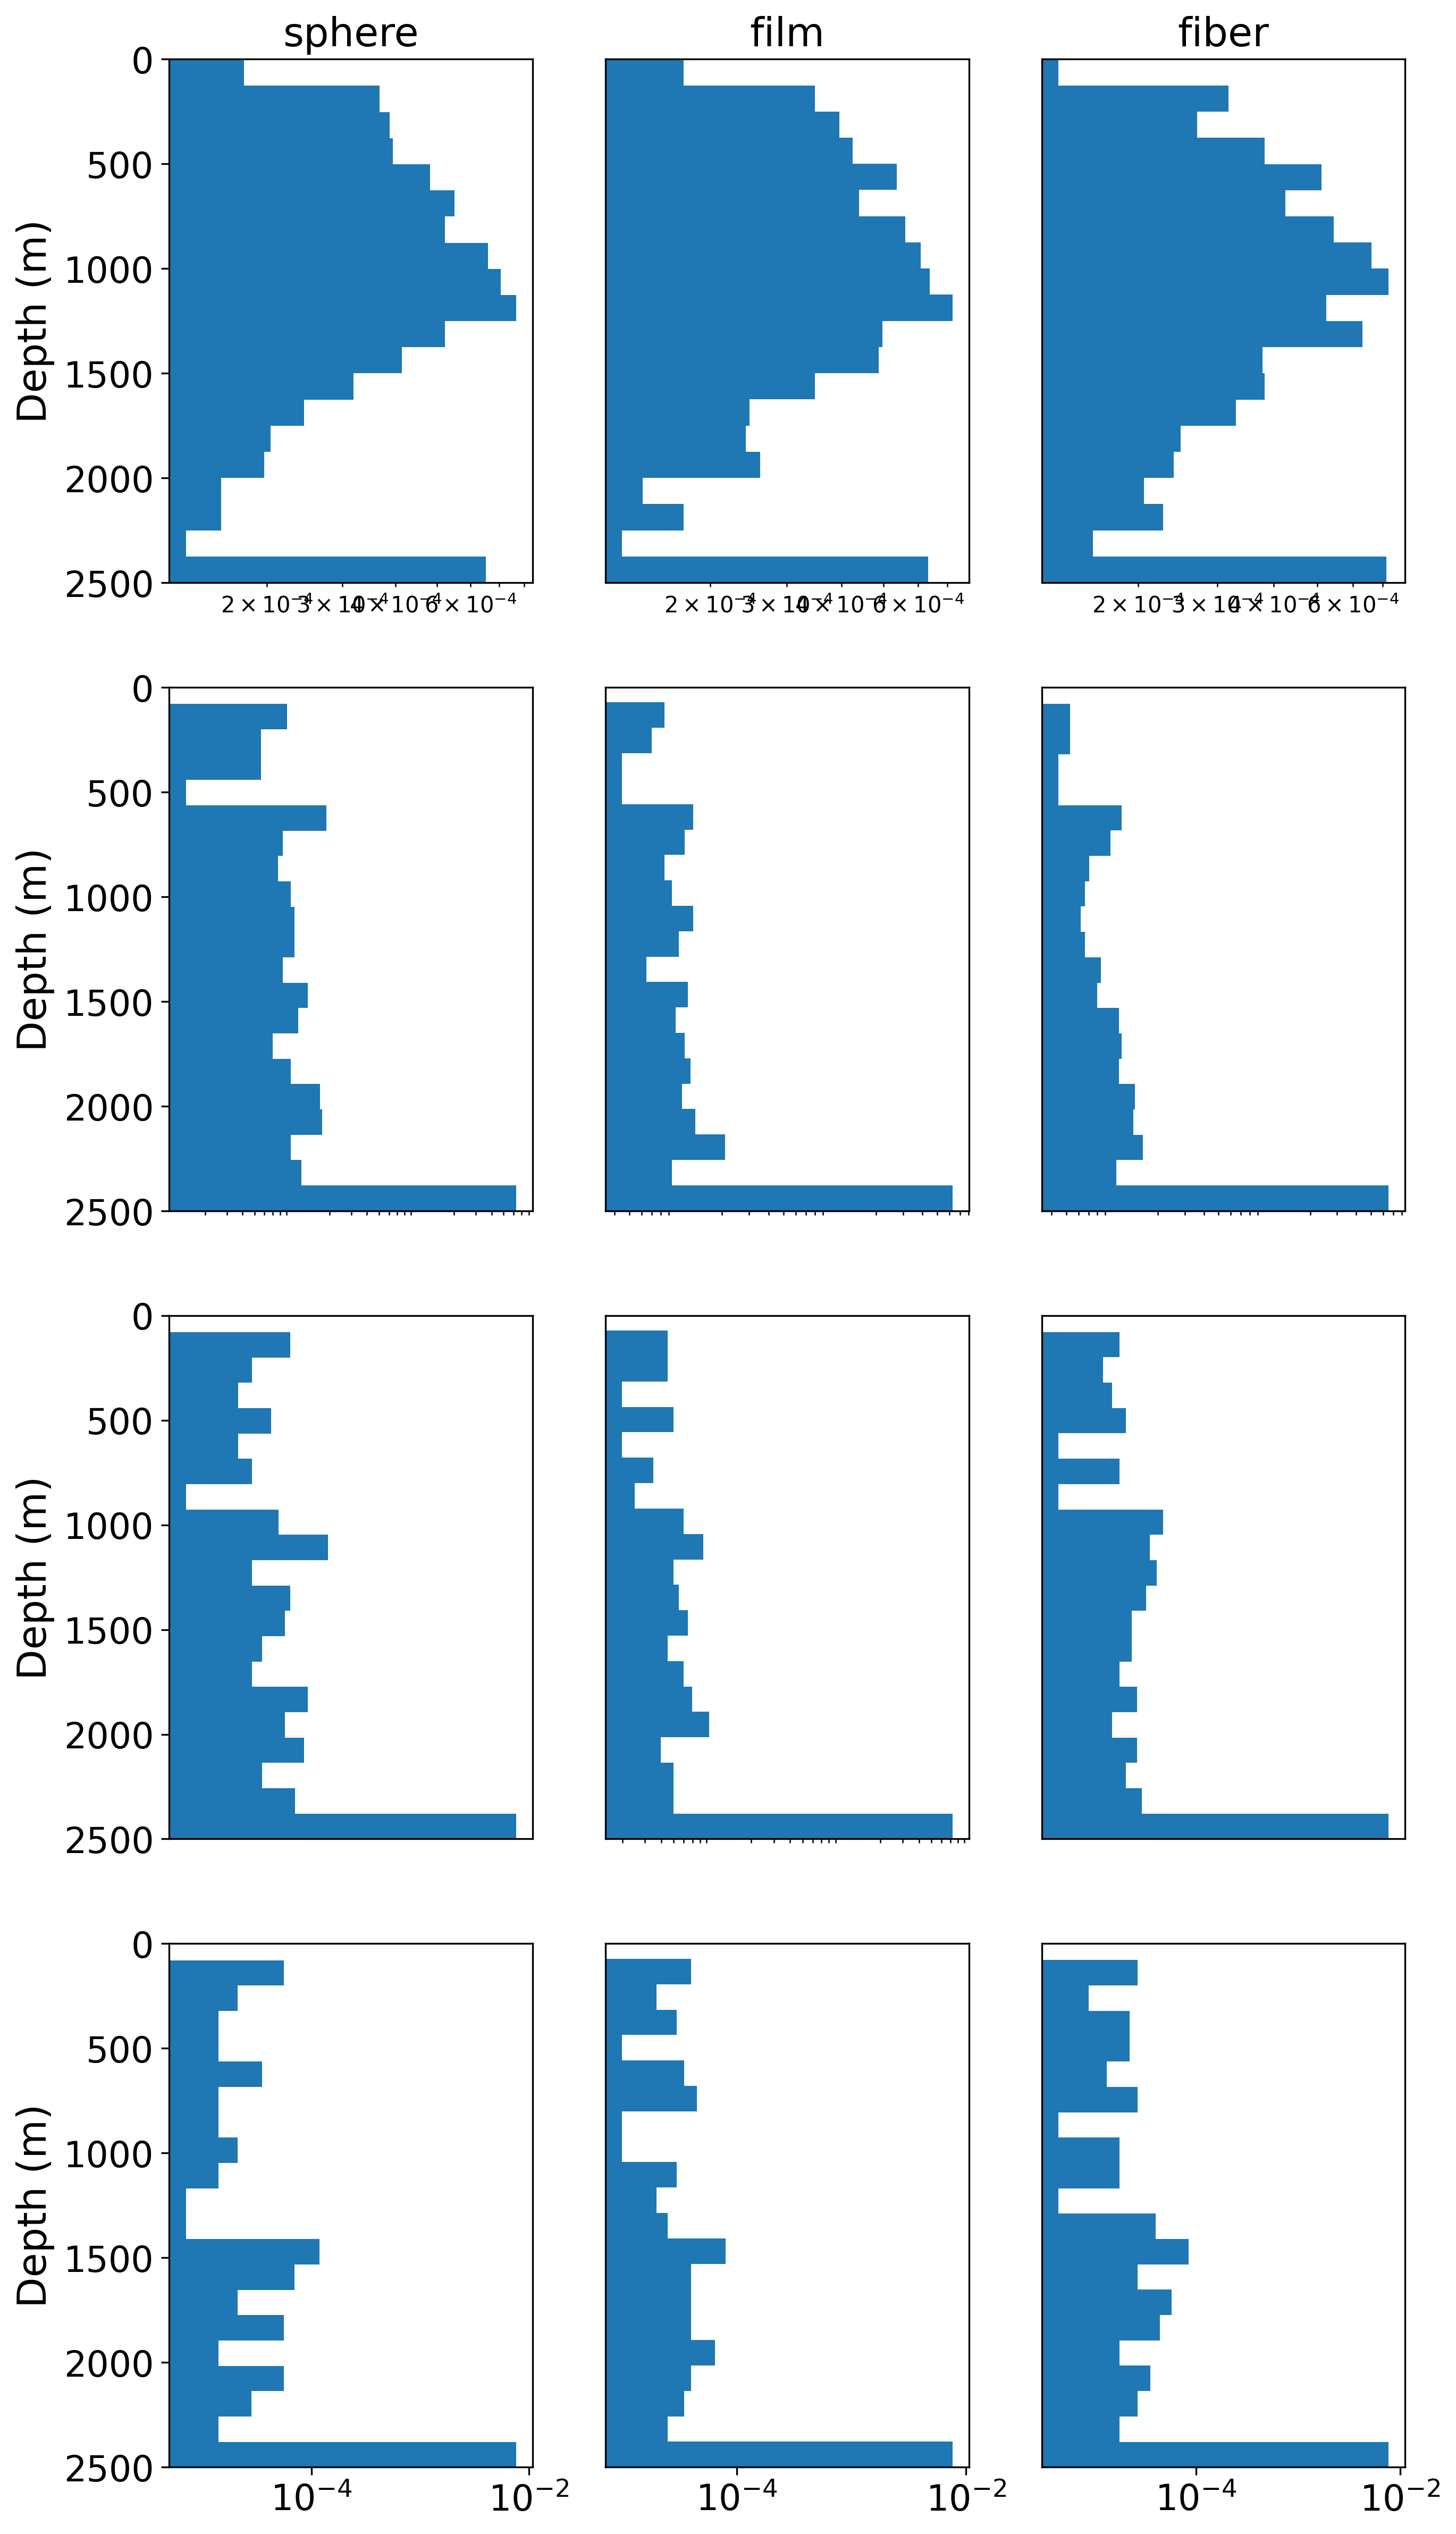

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os 
import pandas as pd
import re
import copy
import math
import numpy.ma as ma
import csv
import warnings

# Data file reader

# .xlsx reader
def readexcel(file_name):
    
    data = pd.read_excel(file_name)
    train_data = np.array(data)  # np.ndarray()
    excel_list = train_data.tolist()  # list
    
    return excel_list

# .csv reader
def csvimport(file_name):
    
    smiles = []
    with open(file_name,'r',encoding='UTF-8') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:  
            smiles.append(row)
    smiles[0][0] = 'No.'
    
    return(smiles) 

def csvimport1(file_name):
    
    smiles = []
    with open(file_name) as csvfile:
        csv_reader = csv.reader(csvfile)  
        for row in csv_reader: 
            smiles.append(row)
    smiles[0][0] = 'No.'
    
    return(smiles) 

# Data Import
base_info_all = []
file_name = './Data/LDMP_sim_20240406.csv'
base_info = csvimport(file_name)

file_name = ['500','1000','1100','1200','1300','1400','1500','1600','1700','1800','1900','2000','2500'
             ,'3000','3200','3400','3600','3800','4000','4500','4700']
title = ['(A) 30 days','(B) 100 days','(C) 200 days','(D) 300 days','(E) 400 days','(F) 500 days']

data_sphere = []
data_film = []
data_fiber = []

base_info_sphere = []
base_info_film = []
base_info_fiber = []

for i in range(len(file_name)):
    file_op = './Data/LDMP_trajectory_' + file_name[i] + '.csv'
    dataset = csvimport(file_op)
    for j in range(1,len(dataset)):
        if base_info[j][1] == 'sphere':
            data_sphere.append(dataset[j][1:])
            base_info_sphere.append(base_info[j][1:])
        elif base_info[j][1] == 'film':
            data_film.append(dataset[j][1:])
            base_info_film.append(base_info[j][1:])
        else:
            data_fiber.append(dataset[j][1:])
            base_info_fiber.append(base_info[j][1:])

data_sphere = np.array(data_sphere)
data_film = np.array(data_film)
data_fiber = np.array(data_fiber)

cut_point = [19,99,199,299]
fig,ax = plt.subplots(4,3,figsize=(10,20),dpi=300)
ax = ax.flatten()
upper = 3
lower = 0
num = 0
for j in range(len(cut_point)):
    depth_sphere = data_sphere[:,cut_point[j]].astype('float')
    depth_film = data_film[:,cut_point[j]].astype('float')
    depth_fiber = data_fiber[:,cut_point[j]].astype('float')
    
    if j == 0:
        ax[num].hist(depth_sphere, orientation='horizontal', bins=20, density=True)
        ax[num].set_xticks([])
        ax[num].set_xscale('log')
        ax[num].set_ylabel('Depth (m)', fontsize=18)
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        ax[num].set_title('sphere',fontsize=18)
        num = num + 1

        ax[num].hist(depth_film, orientation='horizontal', bins=20, density=True)
        ax[num].set_xticks([])
        ax[num].set_xscale('log')
        ax[num].set_yticks([])
        ax[num].set_ylim((2500,0))
        ax[num].set_title('film',fontsize=18)
        num = num + 1

        ax[num].hist(depth_fiber, orientation='horizontal', bins=20, density=True)
        ax[num].set_xticks([])
        ax[num].set_xscale('log')
        ax[num].set_yticks([])
        ax[num].set_ylim((2500,0))
        ax[num].set_title('fiber',fontsize=18)
        num = num + 1
        
    elif j == 3:
        ax[num].hist(depth_sphere, orientation='horizontal', bins=20, density=True)
        ax[num].set_xscale('log')
        ax[num].set_ylabel('Depth (m)', fontsize=18)
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        num = num + 1

        ax[num].hist(depth_film, orientation='horizontal', bins=20, density=True)
        ax[num].set_xscale('log')
        ax[num].set_yticks([])
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        num = num + 1

        ax[num].hist(depth_fiber, orientation='horizontal', bins=20, density=True)
        ax[num].set_xscale('log')
        ax[num].set_yticks([])
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        num = num + 1
    
    else:
        ax[num].hist(depth_sphere, orientation='horizontal', bins=20, density=True)
        ax[num].set_xscale('log')
        ax[num].set_xticks([])
        ax[num].set_ylabel('Depth (m)', fontsize=18)
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        num = num + 1

        ax[num].hist(depth_film, orientation='horizontal', bins=20, density=True)
        ax[num].set_xscale('log')
        ax[num].set_yticks([])
        ax[num].set_xticks([])
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        num = num + 1

        ax[num].hist(depth_fiber, orientation='horizontal', bins=20, density=True)
        ax[num].set_xscale('log')
        ax[num].set_yticks([])
        ax[num].set_xticks([])
        ax[num].tick_params(labelsize=16)
        ax[num].set_ylim((2500,0))
        num = num + 1
                    
plt.savefig('./Output/Fig_6.jpg')